# **Author**: **Mohd** **Masood** **Raza**

### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [2]:
data = pd.read_csv("globalterrorismdb_0919dist.csv", encoding='ISO-8859-1', low_memory=False, on_bad_lines='skip')

### Drop unnecessary columns


In [3]:
data.drop(['eventid', 'approxdate', 'resolution', 'latitude', 'longitude', 'location', 'summary', 'provstate', 'city', 'specificity', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gsubname', 'gsubname2', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claimmode2_txt', 'claim3', 'claimmode3', 'claimmode3_txt', 'compclaim', 'weaptype2', 'weaptype2_txt', 'weapsubtype2', 'weapsubtype2_txt', 'weaptype3', 'weaptype3_txt', 'weapsubtype3', 'weapsubtype3_txt', 'weaptype4', 'weaptype4_txt', 'weapsubtype4', 'weapsubtype4_txt', 'weapdetail', 'propextent', 'propextent_txt', 'propvalue', 'propcomment', 'ishostkid', 'nhostkid', 'nhostkidus', 'nhours', 'ndays', 'divert', 'kidhijcountry', 'ransomamt', 'ransomamtus', 'ransompaid', 'ransompaidus', 'ransomnote', 'hostkidoutcome', 'hostkidoutcome_txt', 'nreleased', 'addnotes', 'scite1', 'scite2', 'scite3', 'dbsource', 'INT_LOG', 'INT_IDEO', 'INT_MISC', 'INT_ANY', 'related'], axis=1, inplace=True)


### Rename columns

In [4]:
data.rename(columns={'iyear': 'year', 'imonth': 'month', 'iday': 'day', 'country': 'country_code', 'country_txt': 'country', 'region': 'region_code', 'region_txt': 'region', 'attacktype1': 'attack_type_code', 'attacktype1_txt': 'attack_type', 'targtype1': 'target_type_code', 'targtype1_txt': 'target_type', 'natlty1': 'target_nationality_code', 'gname': 'terrorist_group', 'nkill': 'fatalities', 'nwound': 'injuries'}, inplace=True)

### to get shape of datase

In [5]:
data.shape

(181691, 40)

### reset the Index

In [6]:
data.reset_index(drop=True, inplace=True)

### to get data type of each column

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 40 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   year                     181691 non-null  int64  
 1   month                    181691 non-null  int64  
 2   day                      181691 non-null  int64  
 3   extended                 181691 non-null  int64  
 4   country_code             181691 non-null  int64  
 5   country                  181691 non-null  object 
 6   region_code              181691 non-null  int64  
 7   region                   181691 non-null  object 
 8   vicinity                 181691 non-null  int64  
 9   crit1                    181691 non-null  int64  
 10  crit2                    181691 non-null  int64  
 11  crit3                    181691 non-null  int64  
 12  success                  181691 non-null  int64  
 13  suicide                  181691 non-null  int64  
 14  atta

### to get first few records

In [8]:
data.head()

,year,month,day,extended,country_code,country,region_code,region,vicinity,crit1,...,weapsubtype1,weapsubtype1_txt,fatalities,nkillus,nkillter,injuries,nwoundus,nwoundte,property,ransom
0,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,0,1,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0
1,1970,0,0,0,130,Mexico,1,North America,0,1,...,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,1.0
2,1970,1,0,0,160,Philippines,5,Southeast Asia,0,1,...,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,0.0
3,1970,1,0,0,78,Greece,8,Western Europe,0,1,...,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0
4,1970,1,0,0,101,Japan,4,East Asia,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.0


### Check for null values


In [9]:
data.isnull().sum()

year                            0
month                           0
day                             0
extended                        0
country_code                    0
country                         0
region_code                     0
region                          0
vicinity                        0
crit1                           0
crit2                           0
crit3                           0
success                         0
suicide                         0
attack_type_code                0
attack_type                     0
target_type_code                0
target_type                     0
targsubtype1                10373
targsubtype1_txt            10373
corp1                       42550
target1                       636
target_nationality_code      1559
natlty1_txt                  1559
terrorist_group                 0
gname2                     179678
gname3                     181367
individual                      0
weaptype1                       0
weaptype1_txt 

### Fill the missing values

In [10]:
data.fillna('unknown', inplace=True)

### Drop duplicate values

In [11]:
data.duplicated().sum()

12431

In [12]:
data.drop_duplicates(inplace=True)

### Bar chart showing the number of Terrorist attacks by country


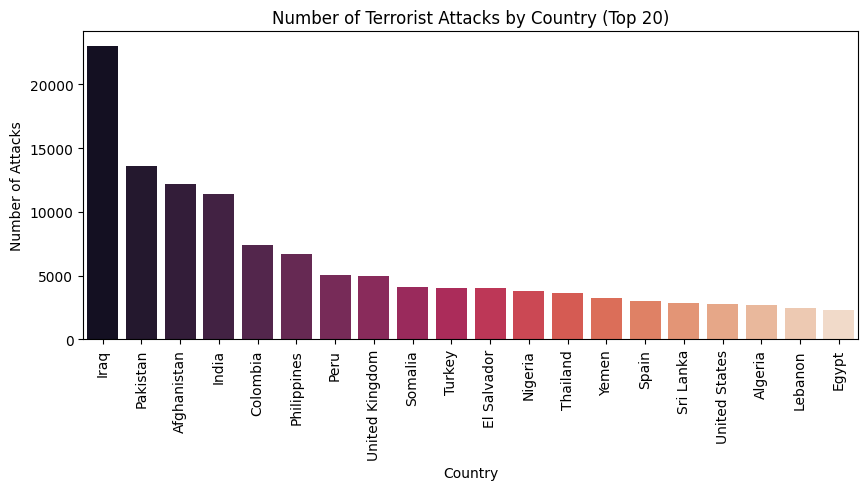

In [13]:
attacks_by_country = data['country'].value_counts().head(20)

plt.figure(figsize=(10,4))
sns.barplot(x=attacks_by_country.index, y=attacks_by_country.values, palette="rocket")
plt.xticks(rotation=90)
plt.xlabel('Country')
plt.ylabel('Number of Attacks')
plt.title('Number of Terrorist Attacks by Country (Top 20)')
plt.show()

### time series plot of the number of attacks over time


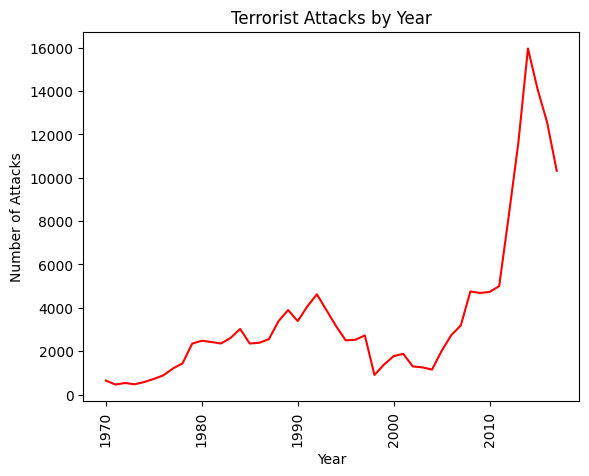

In [14]:
attacks_by_year = data.groupby('year').size().reset_index(name='count')

sns.lineplot(x='year', y='count', data=attacks_by_year, color='red')
plt.xlabel('Year')
plt.xticks(rotation=90)
plt.ylabel('Number of Attacks')
plt.title('Terrorist Attacks by Year')
plt.show()

### Create a pivot table with counts of attacks by year and country

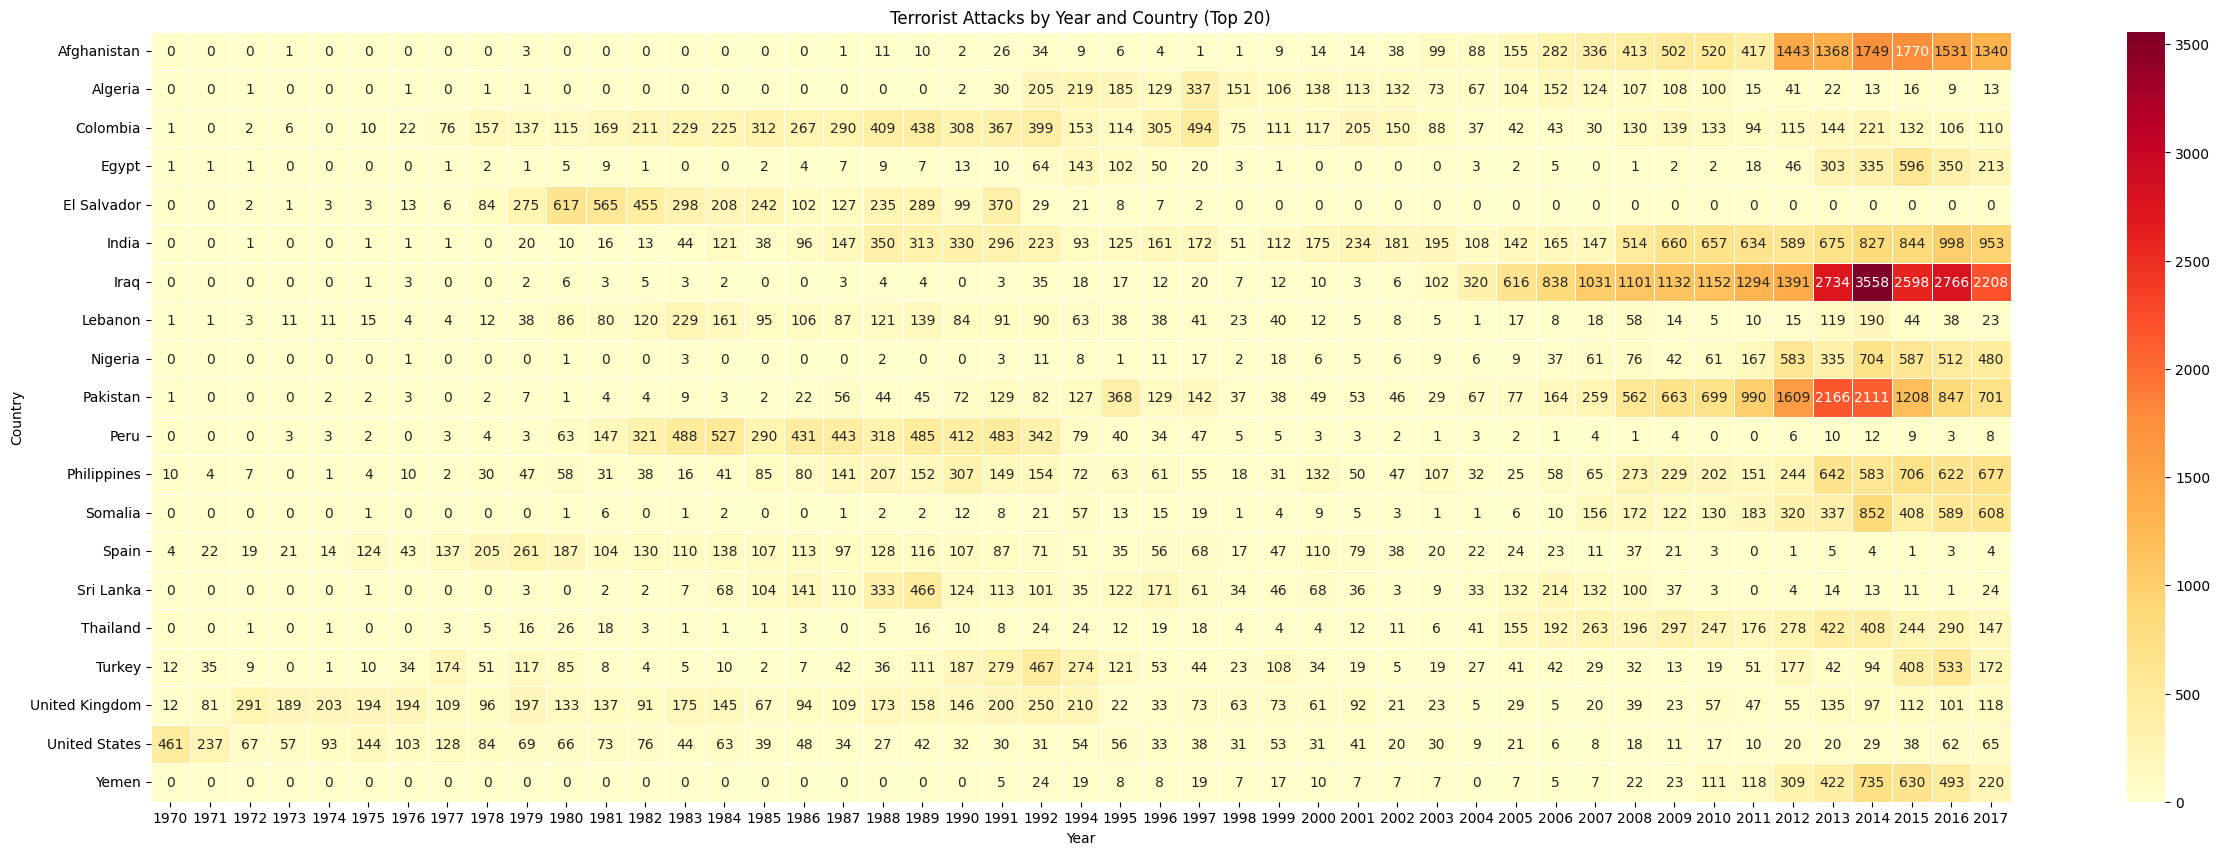

In [15]:
top_50_countries = data.groupby('country')['attack_type'].count().nlargest(20).index
data_top_50_countries = data[data['country'].isin(top_50_countries)]

attacks_by_year_and_country = data_top_50_countries.pivot_table(index='country', columns='year', values='attack_type', aggfunc='count', fill_value=0)

plt.figure(figsize=(30,10))
sns.heatmap(attacks_by_year_and_country, cmap='YlOrRd', linewidths=.5, annot=True, fmt='g')
plt.title('Terrorist Attacks by Year and Country (Top 20)')
plt.xlabel('Year')
plt.ylabel('Country')
plt.show()

### Distribution of the target variable

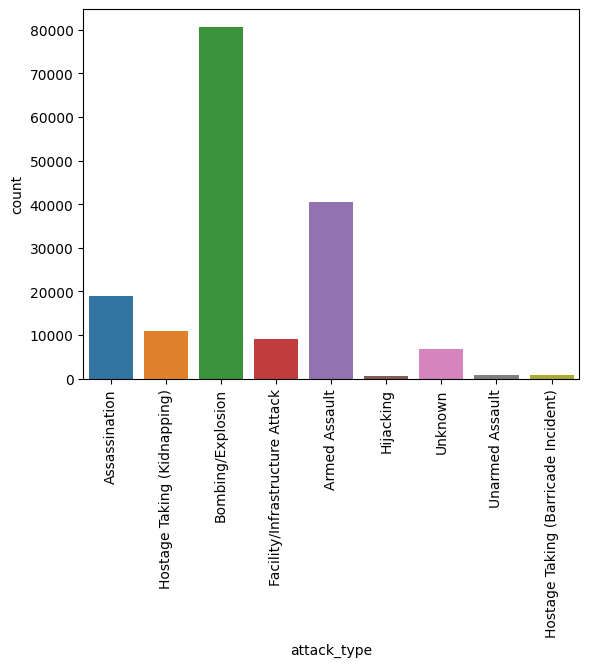

In [16]:
sns.countplot(x='attack_type', data=data)
plt.xticks(rotation=90)
plt.show()

## Hot zones of terrorism

In [17]:
hot_zones = data[data['country'].isin(['Iraq', 'Pakistan', 'Afghanistan', 'India', 'Nigeria', 'United States'])]
print(hot_zones['country'].value_counts())

Iraq             23020
Pakistan         13631
Afghanistan      12197
India            11433
Nigeria           3764
United States     2769
Name: country, dtype: int64


# **Security Issues and Insights:**


### 1. The countries that are most affected by terrorism are Iraq, Afghanistan, Pakistan, India, and Colombia. These countries are hot zones of terrorism.

### 2. The number of attacks has been increasing since the 2000s

### 3. The most common types of terrorist attacks are bombings/explosions and armed assaults.
### 4. Most of the attacks occur in the Middle East and South Asia regions